# Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid


# Data

In [2]:

data_1 = pd.read_csv("data-1.txt")
data_2 = pd.read_csv("data-2.txt")
T = 18.1 + 273 #K
mi1 = 1.03  # g
mf1 = 0.97  # g
mi2 = 0.97  # g
mf2 = 0.92  # g
h1 = 14.7  # cm
h2 = 13.2  # cm
v1 = 25  # mL
v2 = 35  # mL
patm = round(563 / 760,2)  # atm
pvapor = round( 15.48 / 760,2)  # atm


In [3]:
data_1

,t(s),I(A)
0,0.0,0.932
1,30.0,0.949
2,60.0,0.944
3,90.0,0.965
4,120.0,0.960
5,150.0,0.882
6,180.0,0.882


In [4]:
data_2

,t(s),I(A)
0,0.0,0.730
1,30.0,0.819
2,60.0,0.788
3,90.0,0.783
4,120.0,0.774
5,150.0,0.844
6,180.0,0.890
7,210.0,0.944


# Plots

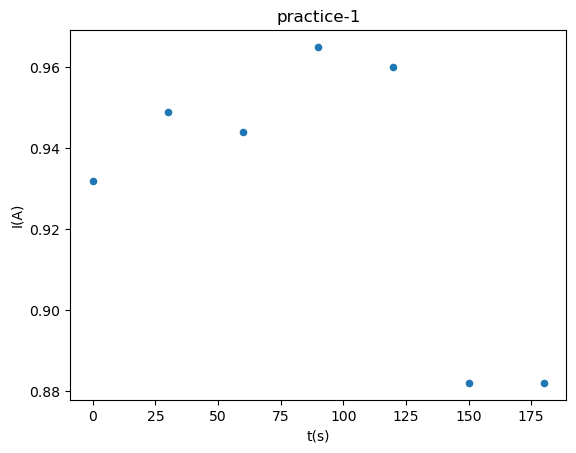

In [5]:
fig1 = data_1.plot.scatter(x="t(s)", y="I(A)")
fig1.set_title("practice-1")
plt.show()

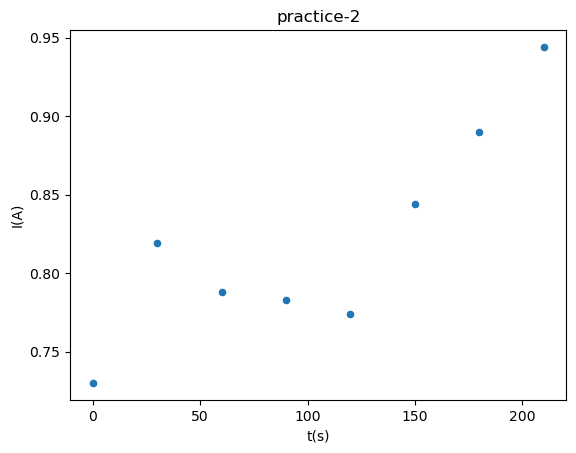

In [6]:
fig2 = data_2.plot.scatter(x="t(s)", y="I(A)")
fig2.set_title("practice-2")
plt.show()

# Information of the reaction Reactions

**Anode:** $Cu_{s} \rightarrow Cu^{2+}_{ac} + 2e^{-} , E° = -0.34V$

**Cathode:** $2H^{+}_{ac} \rightarrow (H_2)_{g}$

**Voltage:** $E° = E°_{cathode} + E°_{anode} = 0V - 0.34V = -0.34V$ (The minus means that need a power supply for the reacttion)

Note that $Cu^{2+}$ reacts with the others ions in the solution producing a second reaction ( a precipitate reaction)

# Amount of charge

$\int_{t_1}^{t_2} I(t)dt$

In [7]:
Q1 = round( trapezoid(data_1["I(A)"], dx=30, axis=0) )
Q2 = round( trapezoid(data_2["I(A)"], dx=30, axis=0) )
"Q1 = "+str(Q1)+" C,        " + "Q2 = "+str(Q2)+" C"

'Q1 = 168 C,        Q2 = 172 C'

# Faraday's constant and Avogadro's with reactions of $Cu$

## Change in the number of mols $Cu$

molar mass   $Cu: 64g/mol$

In [8]:
nCu_1 = round( (mi1 - mf1) / 64 , 5 )
nCu_2 = round( (mi2 - mf2) / 64 , 5 )

"n1 = "+str(nCu_1)+" mols,        " + "n2 = "+str(nCu_2)+" mols"

'n1 = 0.00094 mols,        n2 = 0.00078 mols'

## Results $Cu$

$F = \frac{Q}{zn}$

$N_a = \frac{F}{e}$

$z=2$

$e = 1.60 \cdot 10^{-19}C$

In [9]:
F1 = round( ( Q1)/(2*nCu_1) )
F2 = round( ( Q2 )/(2*nCu_2) )
meanF1 = round( (F1+F2)/(2) )
N_a1 = round( round( meanF1/(1.6e-19))/(1e23) , 1 )
str(meanF1) + " C/mol,       N_a = " + str(N_a1)+" mol * 10^23 mol "

'99809 C/mol,       N_a = 6.2 mol * 10^23 mol '

# Faraday's constant and Avogadro's number with mols of $H_2$

## Gas pressure

$p_{gas} = p_{atm} - p_{vapor} - p_{he}$

The $\rho$ of ${H_2SO4}_{ac}$ is approximately constant and their value is $1000kg/m^3$

In [10]:
phe1 = (1000* 9.8 * (h1/100) ) / 101325  # atm
phe2 = (1000 * 9.8 * (h2/100)  ) / 101325 # atm
pgas1 = round(patm - pvapor - phe1,2)
pgas2 = round(patm - pvapor - phe2,2)

"pgas1 = "+str(pgas1)+" atm,        ,pgas2 = "+str(pgas2)+" atm"

'pgas1 = 0.71 atm,        ,pgas2 = 0.71 atm'

## Mols of $H_2$

$n=\frac{PV}{RT}$

$R = 0.082 \frac{atm \cdot L}{mol \cdot K}$


In [11]:
nSO_2_1 = round( (pgas1*(v1/1000) )/(0.082*T) , 6)
nSO_2_2 = round( (pgas2*(v2/1000) )/(0.082*T) , 6)

"nH2-1  = "+str(nSO_2_1)+" mols,        ,nH2-2 = "+str(nSO_2_2)+" mols"

'nH2-1  = 0.000744 mols,        ,nH2-2 = 0.001041 mols'

## Results $H_2$

$F = \frac{Q}{zn}$

$N_a = \frac{F}{e}$

$z=2$

$e = 1.60 \cdot 10^{-19}C$



In [12]:
F1 = round( ( Q1)/(2*nSO_2_1) )
F2 = round( ( Q2 )/(2*nSO_2_2) )
meanF2 = round( (F1+F2)/(2) )
N_a2 = round( round( meanF2 /(1.6e-19))/(1e23) , 1 )
str(meanF2) + " C/mol,       N_a = " + str(N_a2)+" mol * 10^23 mol "


'97758 C/mol,       N_a = 6.1 mol * 10^23 mol '

# Theorical Values

$F = 96484 C/mol$

$N_a = 6.02 \cdot 10^{23}mol$

In [13]:
Ferror1 = round( abs( (meanF1-96484)/96484 )*100 )
Ferror2 = round( abs( (meanF2-96484)/96484 )*100 )
N_aerror1 = round( abs( (N_a1-6.02)/6.02 )*100 )
N_aerror2 = round( abs( (N_a2-6.02)/6.02 )*100 )


"F-error-1 = "+ str(Ferror1) + "%,      " + "F-error-2 = "+ str(Ferror2) + "%,        "+"N_a-error-1 = "+ str(N_aerror1) + "%,      " + "N_a-error-2 = "+ str(N_aerror2) + "%"

'F-error-1 = 3%,      F-error-2 = 1%,        N_a-error-1 = 3%,      N_a-error-2 = 1%'